In [20]:

#https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?select=spam.csv
import pandas as pd
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r"C:\Users\Acer\Downloads\archive\spam.csv"
d = pd.read_csv(file_path, encoding='latin1')  # Adding encoding parameter to handle potential encoding issues

# Display the first 4 rows
d.head(4)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [21]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
# Drop the specified columns
d.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [23]:
d

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
d.isnull().sum()

v1    0
v2    0
dtype: int64

In [25]:
# Count the number of duplicate rows
num_duplicates = d.duplicated().sum()

# Display the number of duplicate rows
print(num_duplicates)


403


In [26]:
# Rename columns if necessary
d.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

# Remove any leading/trailing whitespace from text
d['text'] = d['text'].str.strip()

# Handle missing values if any (for this example, we'll just drop them)
d.dropna(inplace=True)

# Display the cleaned data
print(d.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [27]:
d.isnull().sum()

label    0
text     0
dtype: int64

In [28]:
# Count the number of duplicate rows
num_duplicates = d.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicate rows
d.drop_duplicates(inplace=True)

# Verify that duplicates are removed
num_duplicates_after = d.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {num_duplicates_after}")

# Display the cleaned data
d.head()

Number of duplicate rows: 414
Number of duplicate rows after cleaning: 0


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


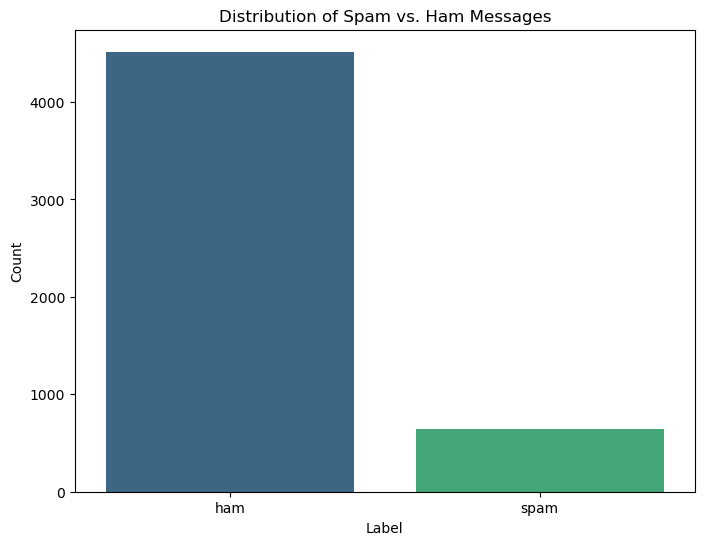

In [29]:
# Bar Chart for label distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.figure(figsize=(8, 6))
sns.countplot(data=d, x='label', palette='viridis')
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

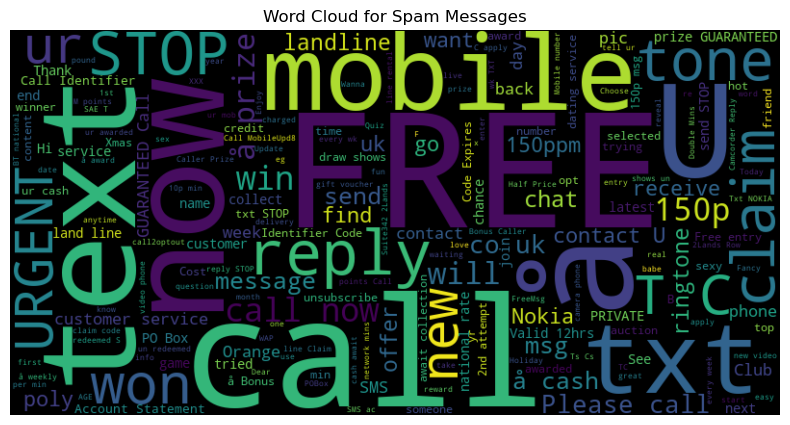

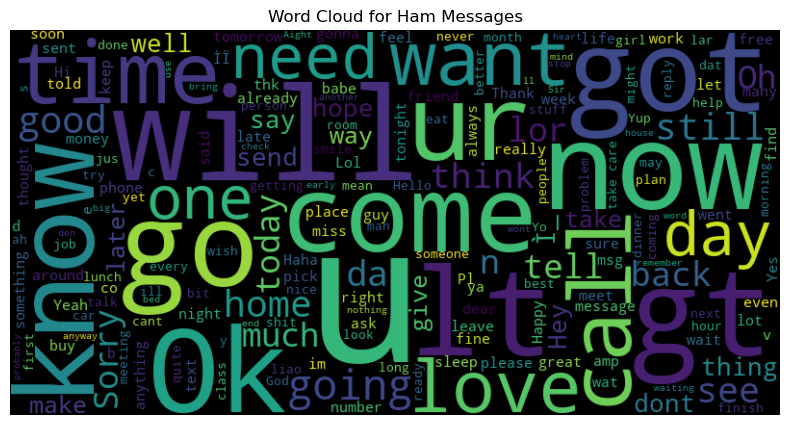

In [30]:
# Word Cloud for Spam Messages
spam_text = ' '.join(d[d['label'] == 'spam']['text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

# Word Cloud for Ham Messages
ham_text = ' '.join(d[d['label'] == 'ham']['text'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(ham_text)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

In [31]:
# Apply word tokenization and count the number of words
# Apply functions to count number of characters and number of sentences
d['number_char'] = d['text'].apply(len)
d['number_words'] = d['text'].apply(lambda x: len(nltk.word_tokenize(x)))
d['number_sentence'] = d['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Display the dataframe with the new column
print(d.head())

  label                                               text  number_char  \
0   ham  Go until jurong point, crazy.. Available only ...          111   
1   ham                      Ok lar... Joking wif u oni...           29   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3   ham  U dun say so early hor... U c already then say...           49   
4   ham  Nah I don't think he goes to usf, he lives aro...           61   

   number_words  number_sentence  
0            24                2  
1             8                2  
2            37                2  
3            13                1  
4            15                1  


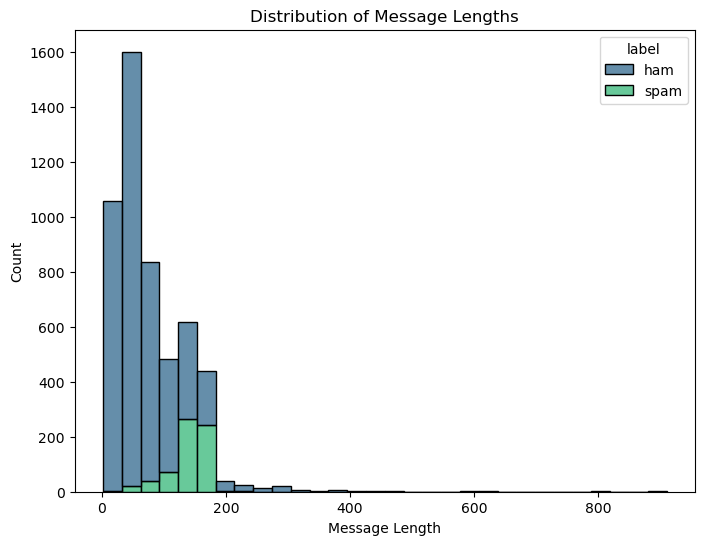

In [32]:
# Histogram for Message Lengths
d['text_length'] = d['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=d, x='text_length', hue='label', multiple='stack', palette='viridis', bins=30)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

In [33]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Ensure you have the necessary NLTK resources
#nltk.download('stopwords')
#nltk.download('wordnet')

# Remove any leading/trailing whitespace from text
d['text'] = d['text'].str.strip()


# Text preprocessing function
def preprocess_text(text):
    try:
        # Convert text to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenization
        words = text.split()
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        # Join words back into a single string
        text = ' '.join(words)
    except Exception as e:
        print(f"Error processing text: {text}")
        print(f"Error: {e}")
        return ""
    return text


In [34]:

# Apply text preprocessing to the 'text' column
d['processed_text'] = d['text'].apply(preprocess_text)

# Display the first few rows of the processed data
print(d.head())



  label                                               text  number_char  \
0   ham  Go until jurong point, crazy.. Available only ...          111   
1   ham                      Ok lar... Joking wif u oni...           29   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3   ham  U dun say so early hor... U c already then say...           49   
4   ham  Nah I don't think he goes to usf, he lives aro...           61   

   number_words  number_sentence  text_length  \
0            24                2          111   
1             8                2           29   
2            37                2          155   
3            13                1           49   
4            15                1           61   

                                      processed_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early h

In [35]:
# Split the dataset into training and testing sets
X = d['processed_text']
y = d['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 4126
Testing set size: 1032


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the pipeline combining a text feature extractor with a simple Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(d['processed_text'], d['label'], test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       892
        spam       0.95      0.95      0.95       140

    accuracy                           0.99      1032
   macro avg       0.97      0.97      0.97      1032
weighted avg       0.99      0.99      0.99      1032


Confusion Matrix:
[[885   7]
 [  7 133]]


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Validate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.9864341085271318
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       892
        spam       0.95      0.95      0.95       140

    accuracy                           0.99      1032
   macro avg       0.97      0.97      0.97      1032
weighted avg       0.99      0.99      0.99      1032

